In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
movies = pd.read_csv('C:/Users/prtyagi/Desktop/New folder/archive1/movies_metadata.csv', converters={"genres": literal_eval})
movies.head()

C:\Users\prtyagi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies.info()
movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

(45466, 24)

In [4]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

movies['genres'] = movies['genres'].apply(get_list)

In [5]:
# Get unique genres from the data
unique_genre = movies['genres'].explode().unique()
unique_genre

# Make a dict assigning an index to a genre
genre_dict = {k: v for v, k in enumerate(unique_genre)}
genre_dict

{'Animation': 0,
 'Comedy': 1,
 'Family': 2,
 'Adventure': 3,
 'Fantasy': 4,
 'Romance': 5,
 'Drama': 6,
 'Action': 7,
 'Crime': 8,
 'Thriller': 9,
 'Horror': 10,
 'History': 11,
 'Science Fiction': 12,
 'Mystery': 13,
 'War': 14,
 'Foreign': 15,
 nan: 16,
 'Music': 17,
 'Documentary': 18,
 'Western': 19,
 'TV Movie': 20,
 'Carousel Productions': 21,
 'Vision View Entertainment': 22,
 'Telescene Film Group Productions': 23,
 'Aniplex': 24,
 'GoHands': 25,
 'BROSTA TV': 26,
 'Odyssey Media': 27,
 'Pulser Productions': 28,
 'Rogue State': 29}

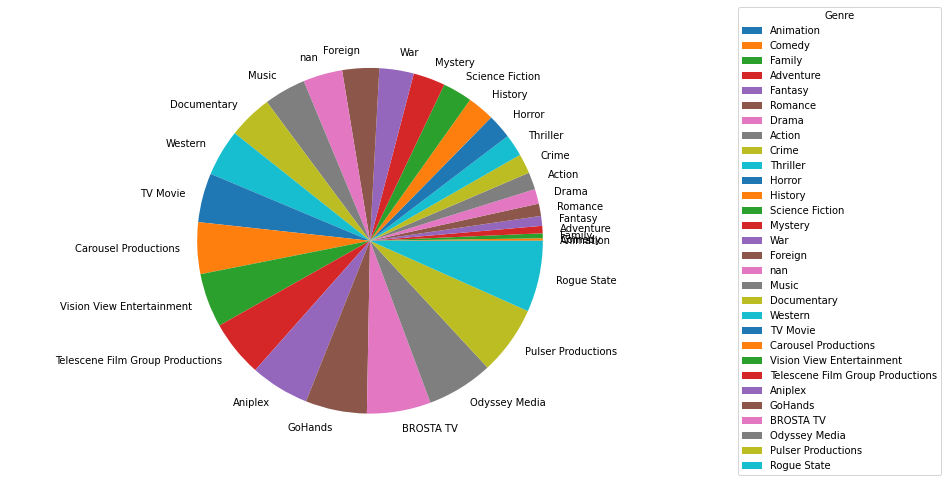

In [6]:
labels = []
sizes = []

for x, y in genre_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
fig, ax = plt.subplots(figsize =(13, 7))
plt.pie(sizes, labels=labels)
ax.legend(labels,
          title ="Genre",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

In [7]:
data = pd.read_csv('C:/Users/prtyagi/Desktop/New folder/archive1/ratings_small.csv')
data.shape

(100004, 4)

In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [9]:
data = data[['userId','movieId', 'rating']]
data

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


<function matplotlib.pyplot.show(close=None, block=None)>

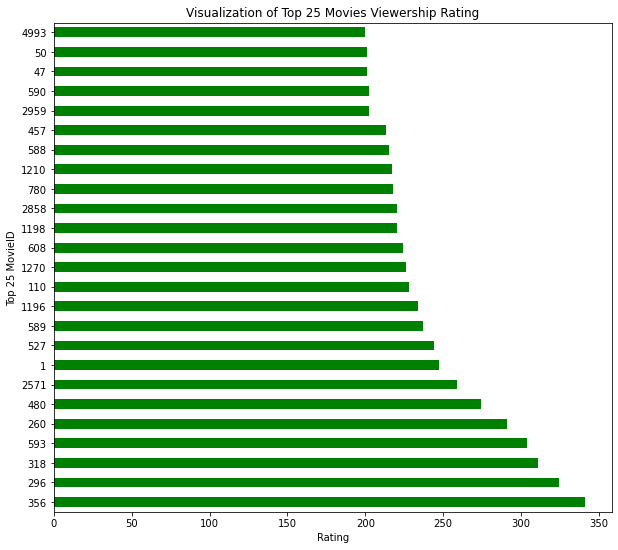

In [10]:
data.groupby('movieId')['rating'].count().sort_values(ascending = False)[:25].plot(kind ='barh', color = 'g', x = 'Rating', y = 'Number of Users', figsize = (10,9))
plt.xlabel('Rating')
plt.ylabel('Top 25 MovieID')
plt.title('Visualization of Top 25 Movies Viewership Rating')
plt.show

In [11]:
ratings_mean_count = pd.DataFrame(data.groupby('movieId')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('movieId')['rating'].count())

<AxesSubplot:xlabel='Number of ratings', ylabel='Number of movies'>

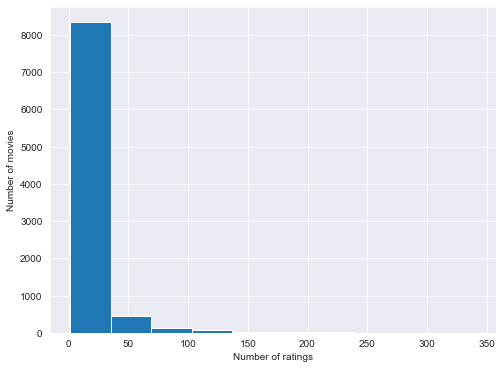

In [12]:
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plt.ylabel('Number of movies')
plt.xlabel('Number of ratings')
ratings_mean_count['rating_counts'].hist(bins=10)

<AxesSubplot:xlabel='Average of ratings', ylabel='Number of movies'>

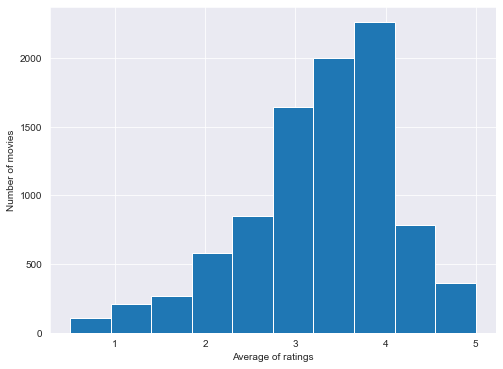

In [13]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plt.ylabel('Number of movies')
plt.xlabel('Average of ratings')
ratings_mean_count['rating'].hist(bins=10)